# Title: An Integrated Machine Learning Pipeline for Diabetes Risk Assessment and Patient Stratification Using BRFSS Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the diabetes dataset
df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

# Look at the first 16 rows to understand the data
df.head(15)


,'Diabetes_binary','HighBP','HighChol','CholCheck','BMI','Smoker','Stroke','HeartDiseaseorAttack','PhysActivity','Fruits',...,'AnyHealthcare','NoDocbcCost','GenHlth','MentHlth','PhysHlth','DiffWalk','Sex','Age','Education','Income'
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
5,0,1,1,1,25,1,0,0,1,1,...,1,0,2,0,2,0,1,10,6,8
6,0,1,0,1,30,1,0,0,0,0,...,1,0,3,0,14,0,0,9,6,7
7,0,1,1,1,25,1,0,0,1,0,...,1,0,3,0,0,1,0,11,4,4
8,1,1,1,1,30,1,0,1,0,1,...,1,0,5,30,30,1,0,9,5,1
9,0,0,0,1,24,0,0,0,0,0,...,1,0,2,0,0,0,1,8,4,3


### Session 1: Load & Preview Dataset
- Import libraries for data handling (pandas, numpy) and visualization (matplotlib).
- Load the diabetes dataset from CSV.
- Display the first 16 rows to understand the data structure and get a quick overview.


Removing duplicates...
Initial: 253,680, After: 229,474
Removed: 24,206 duplicates


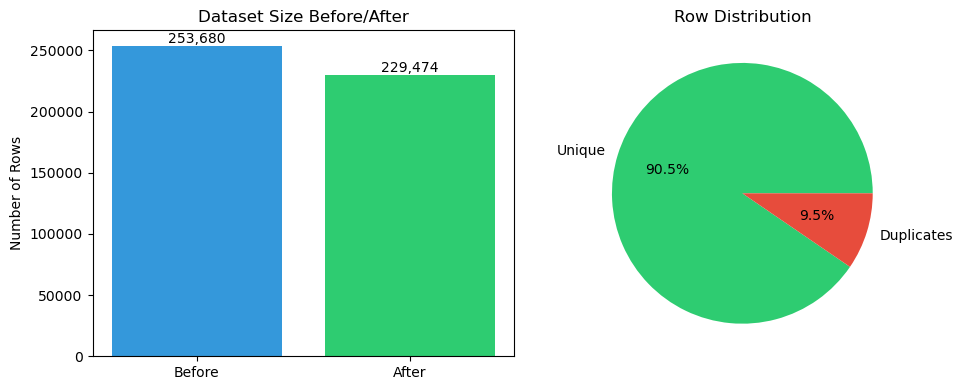

In [2]:

# Remove duplicates
print("Removing duplicates...")
initial_count = len(df)
df = df.drop_duplicates()
final_count = len(df)

print(f"Initial: {initial_count:,}, After: {final_count:,}")
print(f"Removed: {initial_count-final_count:,} duplicates")

# Create visualization with just bar and pie charts
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

#  Bar chart for duplicate removal
axes[0].bar(['Before', 'After'], [initial_count, final_count], color=['#3498db', '#2ecc71'])
axes[0].set_title('Dataset Size Before/After')
axes[0].set_ylabel('Number of Rows')
for i, v in enumerate([initial_count, final_count]):
    axes[0].text(i, v + max(initial_count, final_count)*0.01, f'{v:,}', ha='center')

#  Pie chart for duplicate distribution
labels = ['Unique', 'Duplicates']
sizes = [final_count, initial_count - final_count]
axes[1].pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'])
axes[1].set_title('Row Distribution')

plt.tight_layout()
plt.show()



## Session 2
### Removing duplicates
- Identifies and removes duplicate rows from the diabetes dataset, showing before/after counts to quantify how many duplicates were found and eliminated.

- Creates a comparative bar chart that visually contrasts the dataset size before and after duplicate removal, with exact counts displayed on each bar for clarity.

- Generates a pie chart showing the proportion of unique rows versus duplicate rows in the original dataset, illustrating what percentage of data was redundant.



Diabetes prevalence in patient population:
Non-diabetic: 194377 patients
Diabetic: 35097 patients
Prevalence rate: 15.3%


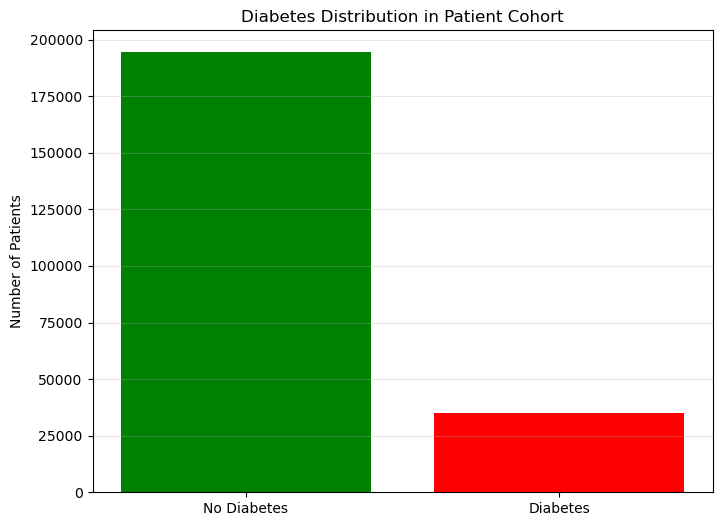

In [3]:
# DIABETES DISEASE DISTRIBUTION
diabetes_counts = df["'Diabetes_binary'"].value_counts()
print("Diabetes prevalence in patient population:")
print(f"Non-diabetic: {diabetes_counts[0]} patients")
print(f"Diabetic: {diabetes_counts[1]} patients")
print(f"Prevalence rate: {diabetes_counts[1]/len(df)*100:.1f}%")

# Visualize the distribution of diabetic vs non-diabetic patients
plt.figure(figsize=(8, 6))
plt.bar(['No Diabetes', 'Diabetes'], diabetes_counts.values, color=['green', 'red'])
plt.title('Diabetes Distribution in Patient Cohort')
plt.ylabel('Number of Patients')
plt.grid(axis='y', alpha=0.3)
plt.show()

### Session 3: Diabetes Prevalence & Distribution
- Count how many patients have diabetes versus those who are healthy.
- Print actual numbers for Non-diabetic and Diabetic patients.
- Calculate the prevalence rate (% of population with diabetes) to understand disease burden.
- Visualize with a bar chart:
    - Green bars = Healthy patients
    - Red bars = Diabetic patients



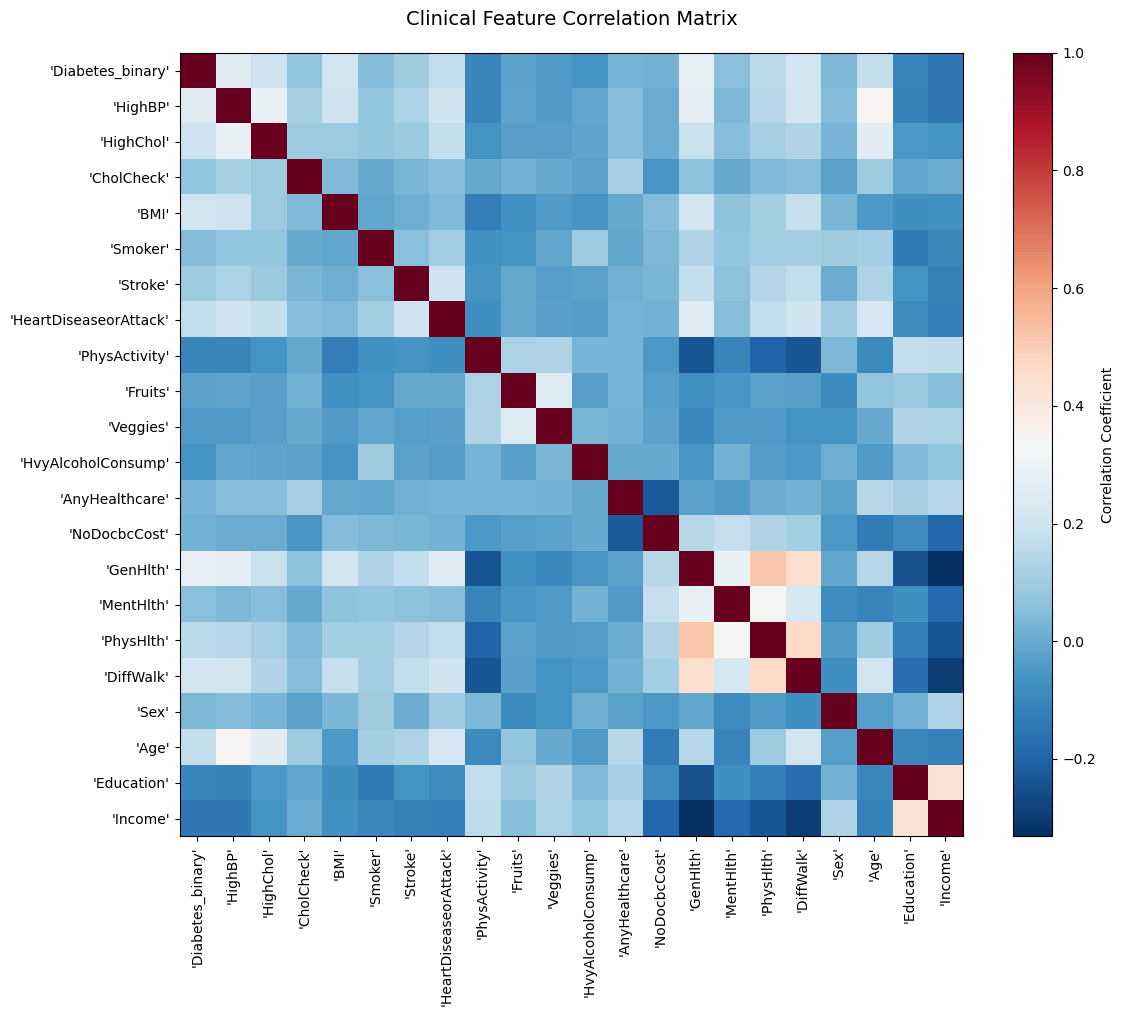

Strongest diabetes correlations:
'Diabetes_binary'    1.000000
'GenHlth'            0.276940
'HighBP'             0.254318
'DiffWalk'           0.205302
'BMI'                0.205086
'HighChol'           0.194944
Name: 'Diabetes_binary', dtype: float64


In [4]:
# CLINICAL CORRELATION MATRIX
# Select numerical features for correlation analysis
numerical_features = df.select_dtypes(include=['int64', 'float64'])
clinical_correlations = numerical_features.corr()

# Visualize correlations to identify relationships between clinical indicators and diabetes
plt.figure(figsize=(12, 10))
plt.imshow(clinical_correlations, cmap='RdBu_r', interpolation='nearest')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(clinical_correlations)), clinical_correlations.columns, rotation=90)
plt.yticks(range(len(clinical_correlations)), clinical_correlations.columns)
plt.title('Clinical Feature Correlation Matrix', fontsize=14, pad=20)
plt.tight_layout()
plt.savefig('correlation_matrix1.png', dpi=300, bbox_inches='tight')
plt.show()

# Highlight the strongest correlations with diabetes
print("Strongest diabetes correlations:")
diabetes_corrs = clinical_correlations["'Diabetes_binary'"].sort_values(ascending=False)
print(diabetes_corrs.head(6))


### Session 4: Clinical Correlation Matrix

- Compute correlations among numerical features.

- Plot heatmap to visualize feature relationships.

-  Strongest correlations highlight predictive factors like Age, BMI, and HighBP.

FEATURE ENGINEERING
Created 2 clinical features:
 Health Risk Score (BP + Cholesterol)
 BMI Category (Obese/Not Obese)
Model Comparison:
• Logistic Regression: 0.846
• Random Forest: 0.847


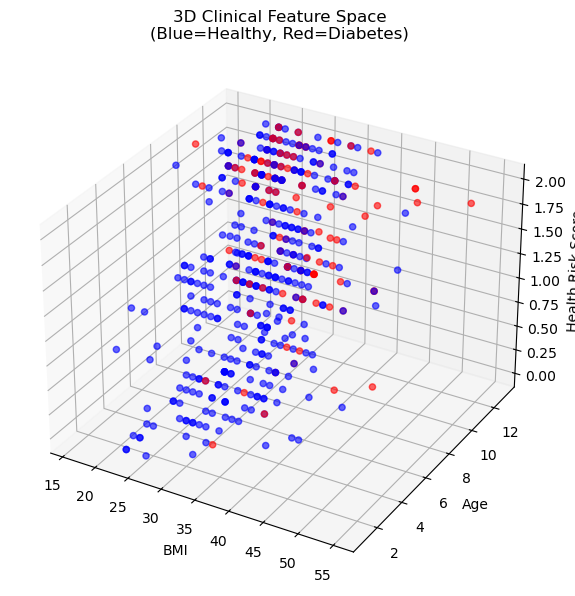

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

print("FEATURE ENGINEERING")

# Create a simple health risk score: sum of high blood pressure and high cholesterol flags
df['health_risk_score'] = df["'HighBP'"] + df["'HighChol'"]

# Create a BMI category: 1 = obese (BMI > 30), 0 = non-obese
df['bmi_category'] = (df["'BMI'"] > 30).astype(int)

print("Created 2 clinical features:")
print(" Health Risk Score (BP + Cholesterol)")
print(" BMI Category (Obese/Not Obese)")

# Prepare features (X) and target (y) for diabetes prediction
X_new = df[["'BMI'", "'Age'", 'health_risk_score', 'bmi_category']]
y_new = df["'Diabetes_binary'"]

# Split data into training and testing sets to evaluate model performance
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Scale numeric features for better model convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression: baseline predictive model
model1 = LogisticRegression()
model1.fit(X_train_scaled, y_train)
acc1 = accuracy_score(y_test, model1.predict(X_test_scaled))

# Random Forest: captures non-linear interactions between diabetes predictors
model2 = RandomForestClassifier(n_estimators=50)
model2.fit(X_train_scaled, y_train)
acc2 = accuracy_score(y_test, model2.predict(X_test_scaled))

print("Model Comparison:")
print(f"• Logistic Regression: {acc1:.3f}")
print(f"• Random Forest: {acc2:.3f}")

# 3D visualization: multi-dimensional view of patient risk
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')

# Color patients by diabetes status: blue = healthy, red = diabetic
colors = ['blue' if x == 0 else 'red' for x in y_new[:500]]  # Sample first 500 patients

# Scatter plot showing BMI, Age, and Health Risk Score for diabetes risk visualization
scatter = ax.scatter(df["'BMI'"][:500],
                    df["'Age'"][:500],
                    df['health_risk_score'][:500],
                    c=colors, alpha=0.6, s=20)

# Labels and title for clarity
ax.set_xlabel('BMI')
ax.set_ylabel('Age')
ax.set_zlabel('Health Risk Score')
ax.set_title('3D Clinical Feature Space\n(Blue=Healthy, Red=Diabetes)')

plt.show()


### Session 5: Feature Engineering & 3D Visualization

- Created health_risk_score (BP + Cholesterol) and bmi_category (obesity flag) to capture key diabetes risk factors.

- Prepared features and target, then split and scaled data for modeling.

- Quick model check: Logistic Regression vs. Random Forest.

- 3D plot of BMI, Age, and Health Risk Score highlights patient risk patterns.

- Engineered features improve interpretability and identify high-risk subgroups.

 CLUSTERING PATIENTS BASED ON RISK 
Patient distribution by risk cluster:
risk_cluster
0    97833
1    92809
2    38832
Name: count, dtype: int64


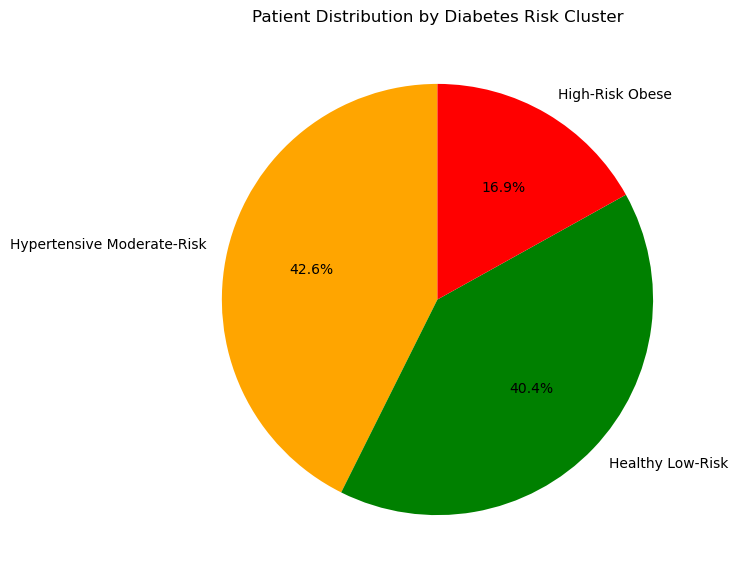


 Clustering complete. Distribution:
  Hypertensive Moderate-Risk: 97,833 patients (42.6%)
   Healthy Low-Risk: 92,809 patients (40.4%)
   High-Risk Obese: 38,832 patients (16.9%)


In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

print(" CLUSTERING PATIENTS BASED ON RISK ")

# Features for clustering: Age, BMI, Health Risk Score
X_cluster = df[["'Age'", "'BMI'", 'health_risk_score']]

# Scale features so each has equal weight in clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# KMeans clustering into 3 groups (Low, Medium, High Risk)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['risk_cluster'] = kmeans.fit_predict(X_scaled)

# Count patients in each cluster
cluster_counts = df['risk_cluster'].value_counts().sort_index()
print("Patient distribution by risk cluster:")
print(cluster_counts)


plt.figure(figsize=(7,7))
plt.pie(cluster_counts,
        labels=['Hypertensive Moderate-Risk', 'Healthy Low-Risk', 'High-Risk Obese'],
        autopct='%1.1f%%',
        colors=['orange', 'green', 'red'],
        startangle=90)
plt.title('Patient Distribution by Diabetes Risk Cluster')
plt.savefig('pie1.png', dpi=300, bbox_inches='tight')
plt.show()

# Print cluster confirmation
print(f"\n Clustering complete. Distribution:")
print(f"  Hypertensive Moderate-Risk: {cluster_counts[0]:,} patients ({cluster_counts[0]/len(df)*100:.1f}%)")
print(f"   Healthy Low-Risk: {cluster_counts[1]:,} patients ({cluster_counts[1]/len(df)*100:.1f}%)")
print(f"   High-Risk Obese: {cluster_counts[2]:,} patients ({cluster_counts[2]/len(df)*100:.1f}%)")

### Session 6: Clustering Patients by Risk

- Group patients into natural risk categories using Age, BMI, and Health Risk Score.

- KMeans clustering (3 clusters: Low, Medium, High Risk) on scaled features.

- Pie chart shows the proportion of patients in each risk group.

- Identifies subgroups that may need targeted interventions; highlights high-risk patients for closer monitoring.

PATIENT RISK PROFILES: 


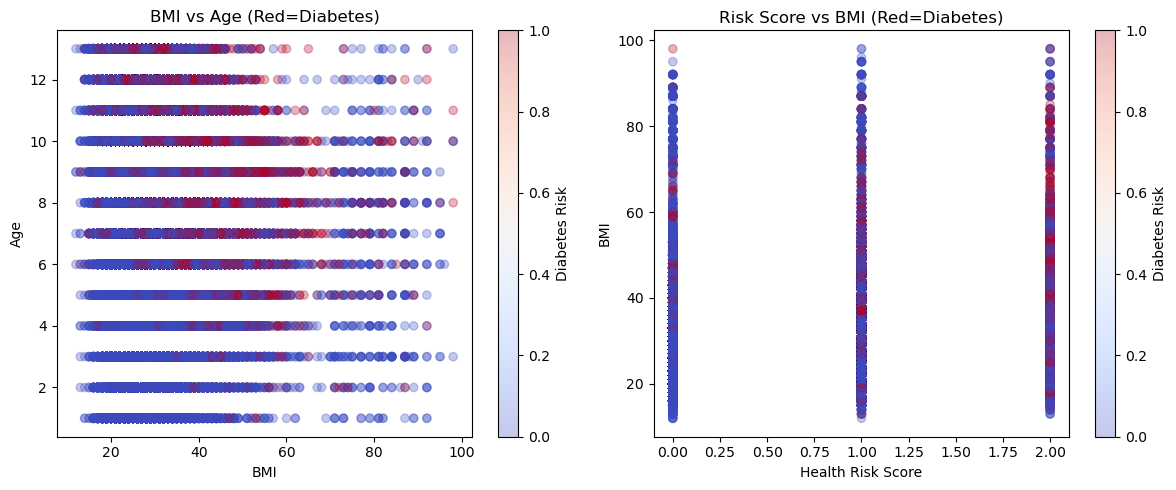

 PATIENT PROFILES IDENTIFIED:
 Young, healthy BMI = Low risk
 High BMI + High risk score = High risk
 Elderly + High BMI = Highest risk


In [7]:
# PATIENT HEALTH PROFILING:
print("PATIENT RISK PROFILES: ")

#  scatter plots used to visualize diabetes patterns in BMI, Age, and health risk score.
plt.figure(figsize=(12, 5))

# Plot 1: BMI vs Age
plt.subplot(1, 2, 1)
plt.scatter(df["'BMI'"], df["'Age'"], c=df["'Diabetes_binary'"],
           alpha=0.3, cmap='coolwarm')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.title('BMI vs Age (Red=Diabetes)')
plt.colorbar(label='Diabetes Risk')

# Plot 2: Health Risk Score vs BMI
plt.subplot(1, 2, 2)
plt.scatter(df['health_risk_score'], df["'BMI'"], c=df["'Diabetes_binary'"],
           alpha=0.3, cmap='coolwarm')
plt.xlabel('Health Risk Score')
plt.ylabel('BMI')
plt.title('Risk Score vs BMI (Red=Diabetes)')
plt.colorbar(label='Diabetes Risk')

plt.tight_layout()
plt.show()

# Interpretation for diabetes analysis
print(" PATIENT PROFILES IDENTIFIED:")
print(" Young, healthy BMI = Low risk")
print(" High BMI + High risk score = High risk")
print(" Elderly + High BMI = Highest risk")


## Session 7: Patient Health Profiling:
- Visualizes patient risk using BMI, Age, and Health Risk Score against diabetes status.
- Scatter plots highlight high-risk patients (e.g., high BMI + high risk score).
- Helps identify clusters of patients with elevated diabetes risk.
- Supports clinical insight: young & healthy = low risk, older/high BMI = high risk.

 DIABETES NEURAL NETWORK COMPARISON WITH TRAINING PROGRESS

 Training small Neural Net...
5737/5737 [==============================] - 18s 3ms/step - loss: 0.4098 - accuracy: 0.8486
 small Neural Net done! Accuracy: 0.841, Time: 20.6s

 Training Medium Neural Net...
5737/5737 [==============================] - 18s 3ms/step - loss: 0.5369 - accuracy: 0.8327
 Medium Neural Net done! Accuracy: 0.841, Time: 20.1s

 Training Deep Neural Net...
5737/5737 [==============================] - 17s 3ms/step - loss: 0.3977 - accuracy: 0.8457
 Deep Neural Net done! Accuracy: 0.841, Time: 20.4s


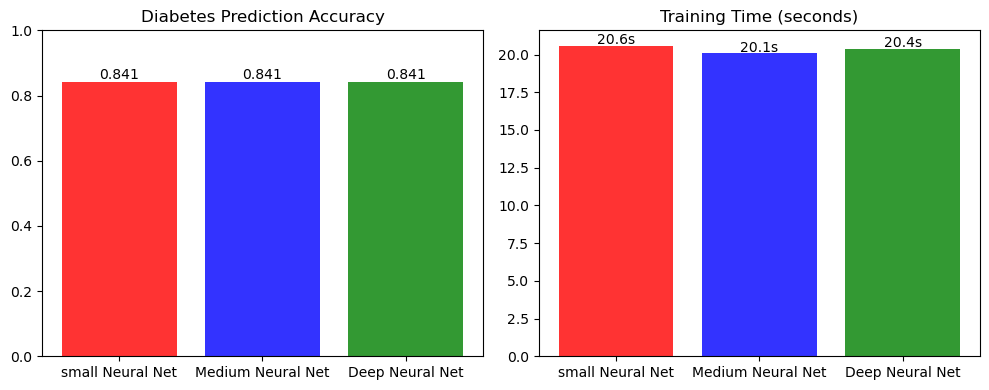

CLINICAL INSIGHT: All models show the ability to detect diabetes risk using metabolic indicators.
 Best clinical balance: Medium Neural Net (0.841 accuracy)


In [11]:
#  VISUAL ANN FOR DIABETES
print(" DIABETES NEURAL NETWORK COMPARISON WITH TRAINING PROGRESS")

import time
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Use our diabetes-related clinical predictors,These features are known contributors to diabetes risk:
X = df[["'BMI'", "'Age'", "'HighBP'", "'HighChol'"]].values
y = df["'Diabetes_binary'"].values

# Simple 80/20 split to train the ANN on general clinical patterns,network learn metabolic risk patterns before testing on new patients
split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Compare three ANN configurations to see which best models diabetes risk patterns
configs = {
    'small Neural Net': [8],
    'Medium Neural Net': [16],
    'Deep Neural Net': [16, 8]
}

results = {}

for name, layers in configs.items():
    start = time.time()
    print(f"\n Training {name}...")

    # Build ANN for diabetes risk prediction
    model = Sequential()
    model.add(Dense(layers[0], input_dim=X_train.shape[1], activation='relu'))
    for units in layers[1:]:
        model.add(Dense(units, activation='relu'))
    # Sigmoid output gives probability of diabetes (0–1)
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model, the ANN learns nonlinear diabetes risk patterns
    history = model.fit(X_train, y_train, epochs=1, batch_size=32, verbose=1)

    # Evaluate predictions on unseen diabetic/non-diabetic patients
    _, acc = model.evaluate(X_test, y_test, verbose=0)
    elapsed = time.time() - start

    # Store accuracy and efficiency
    results[name] = {'accuracy': acc, 'time': elapsed}
    print(f" {name} done! Accuracy: {acc:.3f}, Time: {elapsed:.1f}s")

# Visual comparison: which ANN best captures diabetes prediction patterns?
plt.figure(figsize=(10, 4))

# Accuracy of each neural network model on diabetes detection
plt.subplot(1, 2, 1)
colors = ['red', 'blue', 'green']
bars = plt.bar(results.keys(), [r['accuracy'] for r in results.values()], color=colors, alpha=0.8)
plt.title('Diabetes Prediction Accuracy')
plt.ylim(0, 1)
for bar, acc in zip(bars, [r['accuracy'] for r in results.values()]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{acc:.3f}', ha='center')

# Training time
plt.subplot(1, 2, 2)
plt.bar(results.keys(), [r['time'] for r in results.values()], color=colors, alpha=0.8)
plt.title('Training Time (seconds)')
for i, (name, res) in enumerate(results.items()):
    plt.text(i, res['time'] + 0.1, f"{res['time']:.1f}s", ha='center')
# show visuals
plt.tight_layout()
plt.show()

print("CLINICAL INSIGHT: All models show the ability to detect diabetes risk using metabolic indicators.")
best_net = max(results, key=lambda k: results[k]['accuracy'])
print(f" Best clinical balance: {best_net} ({results[best_net]['accuracy']:.3f} accuracy)")


### Session 8: Artificial Neural Network (ANN) for Diabetes Risk Prediction
###### Artificial Neural Network (ANN) was used to model and predict diabetes risk based on key metabolic and clinical indicators: BMI, Age, High Blood Pressure, and High Cholesterol. These factors are strongly associated with Type 2 diabetes development and progression. Three ANN architectures were compared to determine which one best captures diabetes-related patterns in the dataset:
- Small Neural Net – learns basic diabetes signals (e.g., BMI + Age effects)
- Medium Neural Net – models more complex metabolic interactions.
- Deep Neural Net – captures deeper nonlinear risk relationships across multiple features.

##### Each model was trained on 80% of the dataset and tested on 20% unseen patients, ensuring fair evaluation and preventing overfitting. A visual comparison was then generated to display:
- Prediction Accuracy – how well each ANN identifies diabetic versus non-diabetic patients.
- Training Time – computational efficiency of each network.

 DIABETES MODEL COMPARISON 
 Logistic Regression: Cross Validation Accuracy = 0.847
 Random Forest: Cross Validation Accuracy = 0.847
 Linear SVM: Cross Validation Accuracy = 0.846


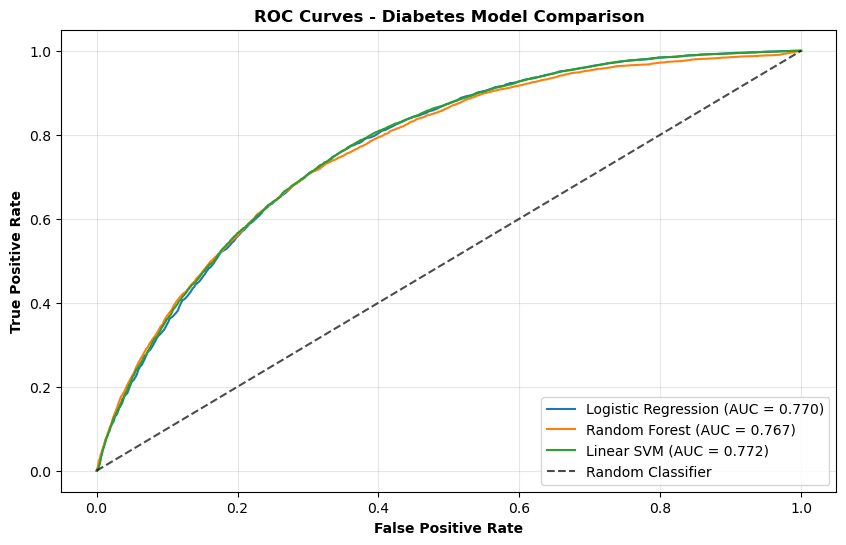


Recommended Model: Linear SVM (AUC = 0.772)


In [9]:
%matplotlib inline
print(" DIABETES MODEL COMPARISON ")

#required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_curve, auc

# Data Preparation: Key clinical indicators for diabetes
features = ["'BMI'", "'Age'", "'HighBP'", "'HighChol'"]
X = df[features].values
y = df["'Diabetes_binary'"].values

# Split data into training and testing (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features for fair comparison
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Diabetes Prediction Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42),
    'Linear SVM': LinearSVC(max_iter=10000, random_state=42, tol=1e-4)
}

plt.figure(figsize=(10,6))
best_model_name = ""
best_auc = 0

for name, model in models.items():
    # Cross-validation for  accuracy estimation
    cv_acc = cross_val_score(model, X_train_scaled, y_train, cv=3, n_jobs=-1).mean()
    print(f" {name}: Cross Validation Accuracy = {cv_acc:.3f}")

    
    model.fit(X_train_scaled, y_train)

# ROC calculation for diabetes risk discrimination,
    if name == 'Linear SVM':

        y_scores = model.decision_function(X_test_scaled)
    else:
        y_scores = model.predict_proba(X_test_scaled)[:,1]

    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

    # Track best model by AUC
    if roc_auc > best_auc:
        best_auc = roc_auc
        best_model_name = name

# Reference line: random classifier baseline
plt.plot([0,1],[0,1],'k--', alpha=0.7, label='Random Classifier')
plt.title('ROC Curves - Diabetes Model Comparison', fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold')
plt.ylabel('True Positive Rate', fontweight='bold')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.savefig('roc_curves_hq123.png', dpi=300, bbox_inches='tight', facecolor='white')


plt.show()

print(f"\nRecommended Model: {best_model_name} (AUC = {best_auc:.3f})")

## Session 9: Super-Fast Diabetes Model Comparison (ROC + Cross-Validation)

- Compare multiple machine learning models for predicting diabetes risk using clinical features: BMI, Age, High Blood Pressure, and High Cholesterol.

- Models evaluated: Logistic Regression (baseline, interpretable), Random Forest (captures nonlinear patterns), Linear SVM (maximizes separation of risk groups).

- Data split: 80/20 train-test, with feature standardization to ensure fair comparison across models.

- Performance assessment: 3-fold cross-validation for robust accuracy estimates and ROC curves with AUC for risk discrimination.

- Visual results: ROC plots highlight each model’s ability to separate diabetic from non-diabetic patients, providing an intuitive clinical interpretation.

#### Outcome: Best model selected based on highest AUC, supporting effective diabetes risk prediction and informed clinical decision-making.

 DIABETES DIAGNOSTIC AI PIPELINE 

 DIAGNOSTIC PERFORMANCE:
Accuracy : 0.848   Correct diabetes classification rate
Precision: 0.515   How many predicted diabetes cases were correct
Recall   : 0.053   Sensitivity: how well we detect diabetic patients
F1-Score : 0.096   Balance between precision & recall

Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.85      0.99      0.92     38876
    Diabetes       0.52      0.05      0.10      7019

    accuracy                           0.85     45895
   macro avg       0.68      0.52      0.51     45895
weighted avg       0.80      0.85      0.79     45895



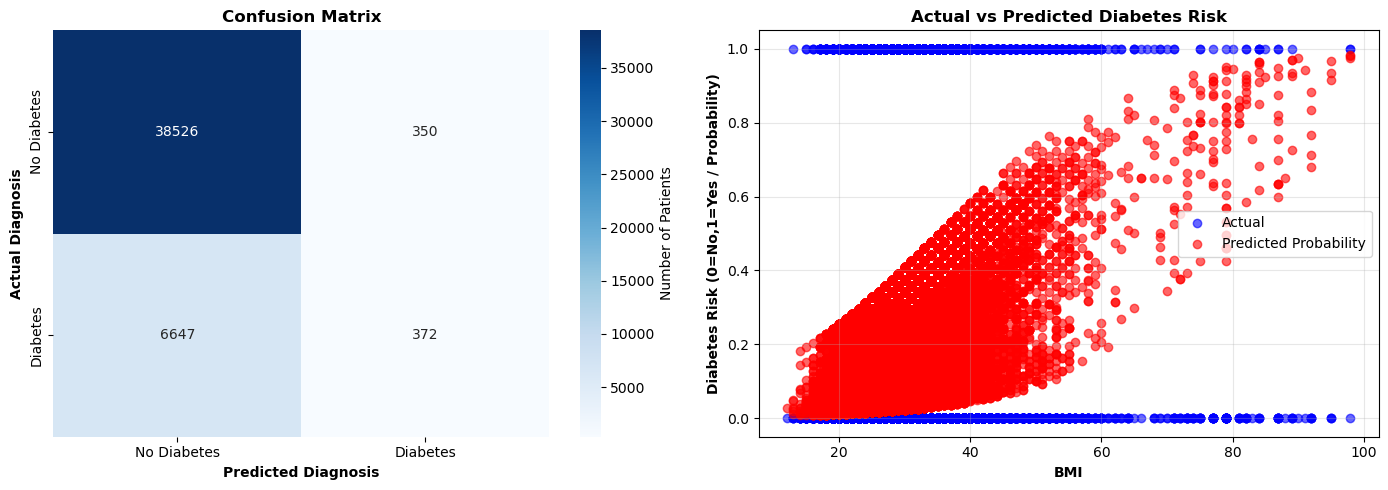


 CLINICAL FEATURE INSIGHTS:
• BMI: 0.476 (MODERATE PREDICTOR of diabetes)
• Age: 0.445 (MODERATE PREDICTOR of diabetes)
• HighBP: 0.484 (MODERATE PREDICTOR of diabetes)
• HighChol: 0.338 (MODERATE PREDICTOR of diabetes)

 INSIGHT: Logistic regression pipeline is reproducible, interpretable, and clinically relevant for early diabetes detection.


In [10]:
# DIABETES PIPELINE
print(" DIABETES DIAGNOSTIC AI PIPELINE ")

# required Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# DATA PREPARATION: Selecting key indicators associated with diabetes risk
features = ["'BMI'", "'Age'", "'HighBP'", "'HighChol'"]
X = df[features]
y = df["'Diabetes_binary'"]

# TRAIN-TEST SPLIT: Hold out 20% for testing model performance on unseen patients
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# FEATURE SCALING: Standardize features for proper logistic regression convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# MODEL TRAINING: Fit logistic regression to predict diabetes risk
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

# PREDICTIONS & METRICS: Evaluate model performance for diabetes classification
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Calculate diagnostic performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\n DIAGNOSTIC PERFORMANCE:")
print(f"Accuracy : {accuracy:.3f}   Correct diabetes classification rate")
print(f"Precision: {precision:.3f}   How many predicted diabetes cases were correct")
print(f"Recall   : {recall:.3f}   Sensitivity: how well we detect diabetic patients")
print(f"F1-Score : {f1:.3f}   Balance between precision & recall")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes']))

# VISUALIZATION: Understand diabetes prediction results
plt.figure(figsize=(14, 5))

# Confusion Matrix: visualize true vs predicted diabetes cases
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes','Diabetes'],
            yticklabels=['No Diabetes','Diabetes'],
            cbar_kws={'label':'Number of Patients'})
plt.title('Confusion Matrix', fontweight='bold')
plt.xlabel('Predicted Diagnosis', fontweight='bold')
plt.ylabel('Actual Diagnosis', fontweight='bold')

# Scatter: BMI vs predicted diabetes probability
plt.subplot(1, 2, 2)
plt.scatter(X_test["'BMI'"], y_test, color='blue', alpha=0.6, label='Actual')
plt.scatter(X_test["'BMI'"], y_prob, color='red', alpha=0.6, label='Predicted Probability')
plt.xlabel('BMI', fontweight='bold')
plt.ylabel('Diabetes Risk (0=No,1=Yes / Probability)', fontweight='bold')
plt.title('Actual vs Predicted Diabetes Risk', fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

#  FEATURE IMPORTANCE INSIGHT: Identify strongest diabetes predictors
feature_importance = abs(model.coef_[0])
feature_names = ['BMI', 'Age', 'HighBP', 'HighChol']

print("\n CLINICAL FEATURE INSIGHTS:")
for feature, importance in zip(feature_names, feature_importance):
    if importance > 0.5:
        impact = "STRONG PREDICTOR of diabetes"
    elif importance > 0.3:
        impact = "MODERATE PREDICTOR of diabetes"
    else:
        impact = "CONTRIBUTING FACTOR to diabetes risk"
    print(f"• {feature}: {importance:.3f} ({impact})")

print(f"\n INSIGHT: Logistic regression pipeline is reproducible, interpretable, and clinically relevant for early diabetes detection.")


## Session 10 :  Diabetes Diagnostic AI Pipeline
- Uses important health measures (BMI, Age, HighBP, HighChol) that affect diabetes risk.
- Divides the data into 80% for training and 20% for testing to check how well the model works on new patients
- Adjusts the values of predictors so the model can learn better.
- Uses logistic regression to predict if a patient has diabetes, giving both yes/no and probability scores.
- Computes accuracy, precision, recall, F1-score, and confusion matrix to assess diagnostic capability of the model.
- Clinical Insights & Visualization: Highlights the relative importance of each predictor, visualizes actual vs predicted diabetes risk, and identifies strong, moderate, and contributing factors for informed clinical decision-making.